# Practica 2

* José Luis Reynoso Tiu
* 201345126

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk import pos_tag, ne_chunk

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker_tab')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package average

True

## Leer archivos CSV y TXT

In [2]:
csv_file = 'datos.csv'
df = pd.read_csv(csv_file)

with open('Coursera Comments.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

## Pandas y Numpy

### Proceso para la limpieza de datos
* Primero eliminamos valores nulos del DataFrame
* Luego eliminamos los registros duplicados
* Por ultimo convertimos las columnas relevantes a su tipo de dato mas conveniente

In [3]:
df = df.dropna()
df = df.drop_duplicates()

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Review'] = df['Review'].astype(str)
df['Review'] = df['Review'].str.extract('(\d+)').astype(float)
df.head(3)

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,11.0,Flexible schedule,582.0,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
5,So You Think You Know Tango?,4.6,Beginner level,5.0,Flexible schedule,107.0,Gain an appreciation for the Argentine Tango a...,[],['Module 1: The Many Dimensions of Tango and T...,['Kristin Wendland'],['Emory University'],Arts and Humanities,https://www.coursera.org/learn/tango
13,Basic Elements of Design: Design Principles an...,4.7,Beginner level,10.0,Flexible schedule,925.0,Recognize ways to work with graphic designers ...,"['Print Design', 'online design', 'Color Theor...","['What is Graphic Design?', 'Elements of Desig...",['Lori Poole'],['University of Colorado Boulder'],Arts and Humanities,https://www.coursera.org/learn/basic-elements-...


### Promedio de calificaciones
* Para empezar agrupamos los cursos por titulo y seleccionamos la columna 'Rating' y finalmente utilizamos la funcion 'mean' para sacar el promedio de las calificaciones
* Renombramos las columnas
* Se muestra un ejemplo de 10 filas

In [4]:
promedio = df.groupby('Course Title')['Rating'].mean().reset_index()
promedio.columns = ['Curso', 'Promedio']
promedio.head(10)

,Curso,Promedio
0,Assisting Public Sector Decision Makers With ...,4.8
1,"Comercio, Inmigración y Tipos de Cambio en un...",4.9
2,FPGA computing systems: Background knowledge ...,4.6
3,Future Healthcare Payment Models,4.5
4,IBM and ISC2 Cybersecurity Specialist Profess...,4.8
5,Improving Immunity Based on Traditional Easte...,4.5
6,Introduction to Academic Writing,4.4
7,Natural Language Processing and Capstone Assi...,4.7
8,Preparation for CompTIA A+ Certification Spec...,4.9
9,البرمجة اللغوية العصبية | NLP,4.7


### Cursos con mayor y menor rating
Ya que anteriormente obtuvimos el promedio de cada curso utilizamos las funciones para obtener el curso con el maximo y minimo puntaje
```bash
idxmax //maximo
idxmin //minimo
```

In [5]:
calificacion_mayor = promedio.loc[promedio['Promedio'].idxmax()]
print("El curso con la mayor calificación es:")
print(f"{calificacion_mayor['Curso']} - {calificacion_mayor['Promedio']}")

calificacion_menor = promedio.loc[promedio['Promedio'].idxmin()]
print("\nEl curso con la menor calificación es:")
print(f"{calificacion_menor['Curso']} - {calificacion_menor['Promedio']}")

El curso con la mayor calificación es:
Activity Design with PhET Simulations for STEM Education - 5.0

El curso con la menor calificación es:
Selenium WebDriver with Python - 3.1


### Porcentaje de cursos con horario flexible
Se validaron las filas que tuvieran el valor 'Flexible schedule' y se obtuvo el porcentaje ya que teniamos el total de filas del archivo que paso por la limpieza correspondiente

In [6]:
flexible_courses = df[df['Schedule']=='Flexible schedule']
porcentaje = (len(flexible_courses) / len(df)) * 100
print(f"Porcentaje de cursos con horario flexible: {porcentaje:.2f}%")

Porcentaje de cursos con horario flexible: 100.00%


## NLKT

* Tokenización: utilizamos la funcion  ```word_tokenize```
* Lematización y Stemming: Se utilizó la funcion  ```WordNetLemmatizer y SnowballStemmer``` utilizando los tokens sin palabras vacias
* Eliminación de palabras vacias: Se utilizó la funcion  ```stopwords.words('spanish')``` utilizando los tokens sin palabras vacias 
* Frecuencia de palabras: Se utilizó la funcion  ```FreqDist``` utilizando los tokens lematizados 
* Analisis de sentimientos: Se utilizó la funcion  ```SentimentIntensityAnalyzer```
* Reconocimiento de entidades nombradas: Se utilizó la funcion  ```pos_tag``` utilizando los tokens sin palabras vacias 
* Extraer entidades: Se utilizó la funcion  ```hasattr(subtree, 'label')``` para reconocer cada entidad


In [7]:
tokens = word_tokenize(texto.lower())

stop_words = set(stopwords.words('spanish'))
tokens_sin_stopwords = [palabra for palabra in tokens if palabra not in stop_words]

lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(palabra) for palabra in tokens_sin_stopwords]
stemmer = SnowballStemmer('spanish')
tokens_stemming = [stemmer.stem(palabra) for palabra in tokens_sin_stopwords]

fdist = FreqDist(tokens_lematizados)
palabras_frecuentes = fdist.most_common(10)
print("Tokens originales:", tokens[:10])
print("Tokens lematizados:", tokens_lematizados[:10])
print("Tokens con stemming:", tokens_stemming[:10])
print("Tokens sin palabras vacías:", tokens_sin_stopwords[:10])
print("Palabras más frecuentes:", palabras_frecuentes)

sia = SentimentIntensityAnalyzer()
sentimiento = sia.polarity_scores(texto.lower())
print("\nAnálisis de sentimientos:")
print(f"Positivo: {sentimiento['pos']}")
print(f"Negativo: {sentimiento['neg']}")
print(f"Neutral: {sentimiento['neu']}")
print(f"Compuesto: {sentimiento['compound']}")


pos_tags = pos_tag(tokens_sin_stopwords)
entidades_nombradas = ne_chunk(pos_tags)
entidades = {}
for subtree in entidades_nombradas:
    if hasattr(subtree, 'label'):
        entidad = ' '.join(c[0] for c in subtree)  
        etiqueta = subtree.label()
        if etiqueta not in entidades:
            entidades[etiqueta] = [entidad]
        else:
            entidades[etiqueta].append(entidad)

for etiqueta, entidad_lista in entidades.items():
    print(f"\nTipo de entidad: {etiqueta}")
    for entidad in entidad_lista:
        print(f"  - {entidad}")



Tokens originales: ['abril', 'vargas', 'pérez', '3', 'opiniones', 'pt', 'valorada', 'con', '5', 'estrellas']
Tokens lematizados: ['abril', 'vargas', 'pérez', '3', 'opiniones', 'pt', 'valorada', '5', 'estrellas', '5']
Tokens con stemming: ['abril', 'varg', 'perez', '3', 'opinion', 'pt', 'valor', '5', 'estrell', '5']
Tokens sin palabras vacías: ['abril', 'vargas', 'pérez', '3', 'opiniones', 'pt', 'valorada', '5', 'estrellas', '5']
Palabras más frecuentes: [(',', 6799), ('.', 6466), ('semana', 1641), ('curso', 1324), ('ta', 922), (':', 887), ('“', 869), ('”', 869), ('-', 839), ('participantes', 837)]

Análisis de sentimientos:
Positivo: 0.011
Negativo: 0.034
Neutral: 0.954
Compuesto: -1.0

Tipo de entidad: ORGANIZATION
  - meta-atribución


Resultados

1. Neutral (95.4%): El texto es predominantemente neutral, lo que indica que no contiene emociones fuertes ni positivas ni negativas
2. Negativo (3.4%): Existe una pequeña proporción de emociones negativas, lo cual podría reflejar críticas o comentarios desfavorables.
3. Positivo (1.1%): Hay una mínima expresión de emociones positivas.
4. Compuesto (-1.0)

## Graficas

### Graficas sobre el archivo CSV

#### 1. Gráfico de barras del número de cursos por nivel de dificultad

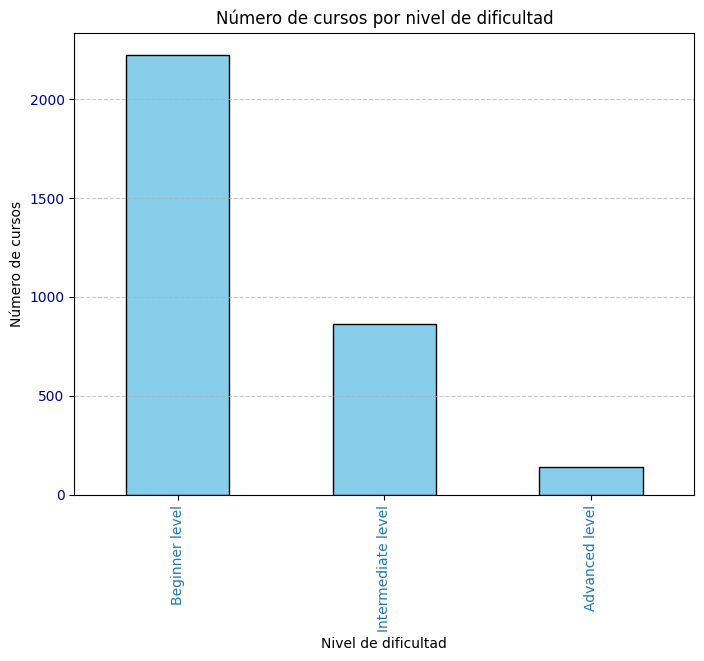

In [8]:
plt.figure(figsize=(8,6))
df['Level'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de cursos por nivel de dificultad')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Número de cursos')
plt.gca().yaxis.set_tick_params(labelcolor='darkblue')
plt.gca().xaxis.set_tick_params(labelcolor='#1f77b4') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El analisis que se puede dar tras observar esta grafica es que hay mas cursos para principiantes y muy pocos avanzados. Lo que puede indicar que Coursera es una plataforma que ofrece mas cursos para un publico objetivo principiante.

 #### 2. Gráfica de barras horizontal: número de cursos en las principales categorías

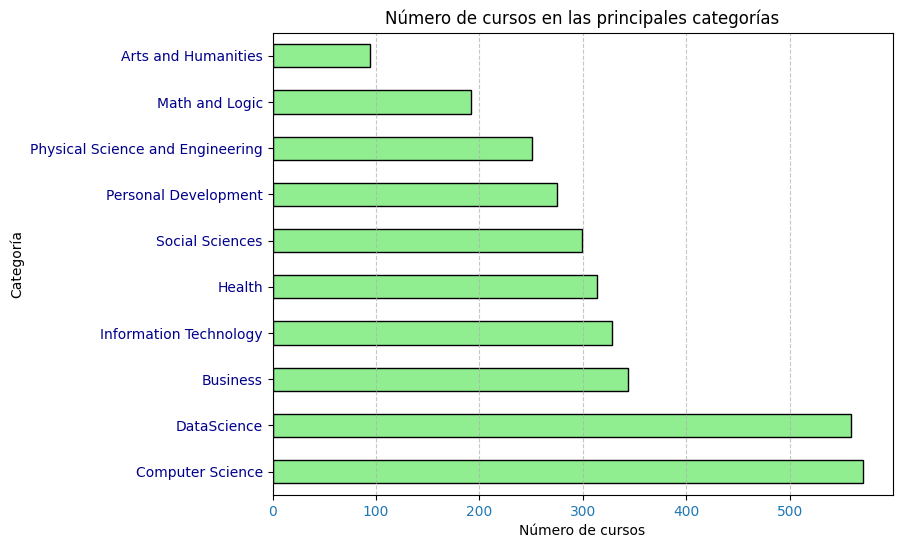

In [9]:
plt.figure(figsize=(8,6))
df['Keyword'].value_counts().head(10).plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Número de cursos en las principales categorías')
plt.xlabel('Número de cursos')
plt.ylabel('Categoría')
plt.gca().yaxis.set_tick_params(labelcolor='darkblue')
plt.gca().xaxis.set_tick_params(labelcolor='#1f77b4') 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Lo que se observa en esta grafica es que se puede encontrar gran cantidad de cursos destinados a tecnología, especialmente a ciencia de datos

#### 3. Gráfico de dispersión: relación entre la duración del curso y el número de revisiones

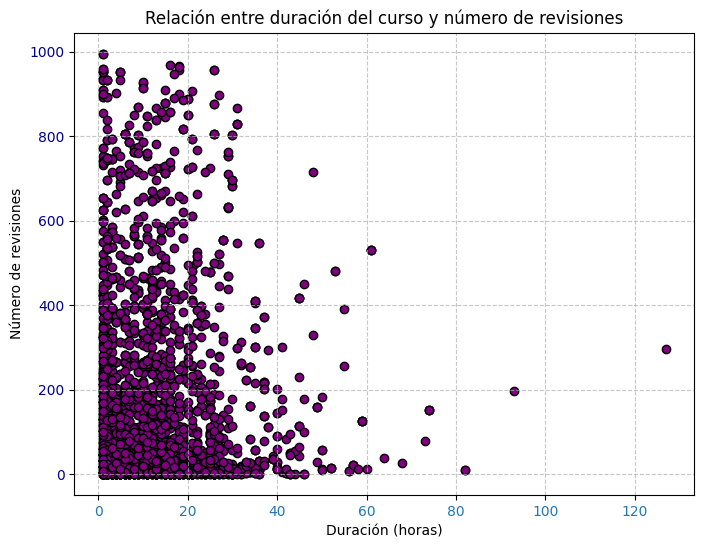

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['Duration'], df['Review'], color='purple', edgecolor='black')
plt.title('Relación entre duración del curso y número de revisiones')
plt.xlabel('Duración (horas)')
plt.ylabel('Número de revisiones')
plt.gca().yaxis.set_tick_params(labelcolor='darkblue')
plt.gca().xaxis.set_tick_params(labelcolor='#1f77b4') 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Las críticas o comentarios se hacen empezando el curso y no tienen un contexto mas general del curso.

#### 4.  Histograma de la distribución de las duraciones de los cursos

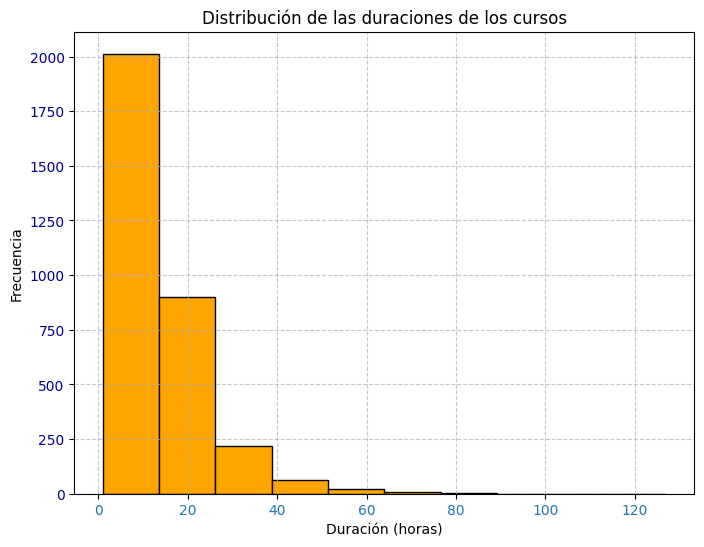

In [11]:
df = df.dropna(subset=['Duration'])

plt.figure(figsize=(8,6))
plt.hist(df['Duration'], bins=10, color='orange', edgecolor='black')
plt.title('Distribución de las duraciones de los cursos')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.gca().yaxis.set_tick_params(labelcolor='darkblue')
plt.gca().xaxis.set_tick_params(labelcolor='#1f77b4') 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Los cursos pueden llegar a ser meramente introductorios ya que la cantidad de horas en un curso pocas veces supera las 20 horas.

#### 5. Gráfico de cajas: distribución de calificaciones por nivel de dificultad

<Figure size 800x600 with 0 Axes>

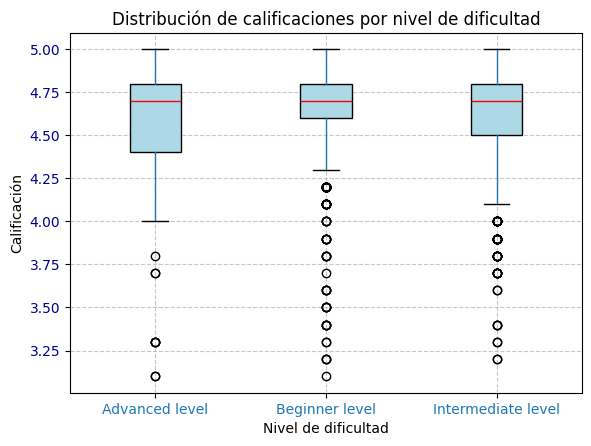

In [12]:
plt.figure(figsize=(8,6))
df.boxplot(column='Rating', by='Level', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='red'))
plt.title('Distribución de calificaciones por nivel de dificultad')
plt.suptitle('')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Calificación')
plt.gca().yaxis.set_tick_params(labelcolor='darkblue')
plt.gca().xaxis.set_tick_params(labelcolor='#1f77b4') 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

La calificacion por el nivel de dificultad no varía tanto, pero si se puede observar que los cursos avanzados son los que tiene la menor puntuación y esto puede ser debido a que los cursos estan enfocados a personas principiantes.

### Graficas de los resultados del archivo .txt

#### 1. Frecuencia de palabras mas utilizadas

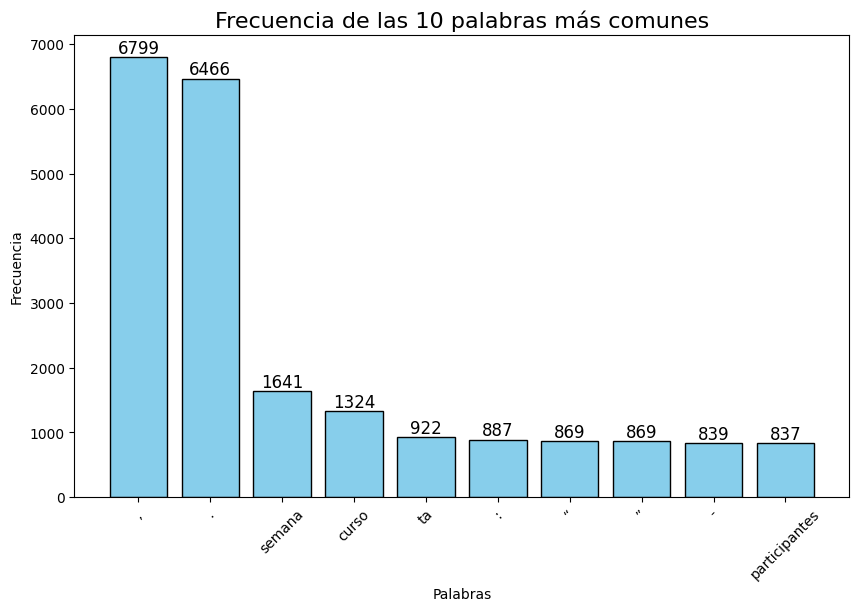

In [13]:
labels, values = zip(*palabras_frecuentes)

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)
plt.title("Frecuencia de las 10 palabras más comunes", fontsize=16)
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


#### 2. Análisis de los sentimientos del texto

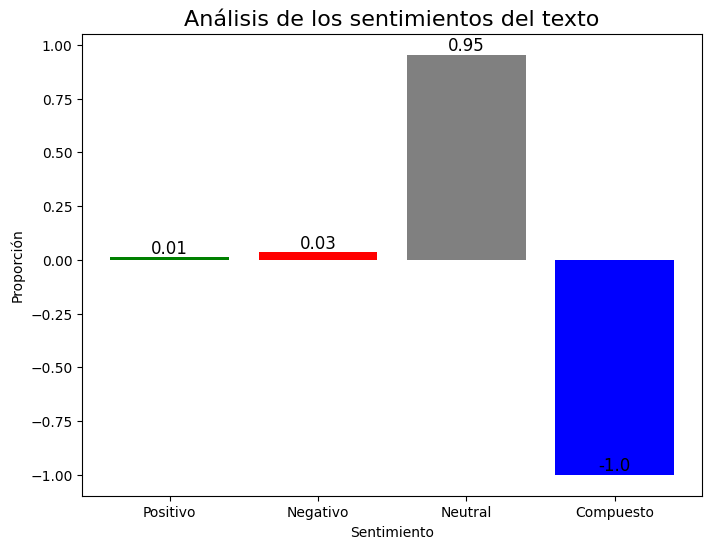

In [14]:
labels_sentimientos = ['Positivo', 'Negativo', 'Neutral', 'Compuesto']
values_sentimientos = [sentimiento['pos'], sentimiento['neg'], sentimiento['neu'], sentimiento['compound']]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels_sentimientos, values_sentimientos, color=['green', 'red', 'gray', 'blue'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)
plt.title("Análisis de los sentimientos del texto", fontsize=16)
plt.xlabel("Sentimiento")
plt.ylabel("Proporción")
plt.show()

### 3. Frecuencia de entidades nombradas

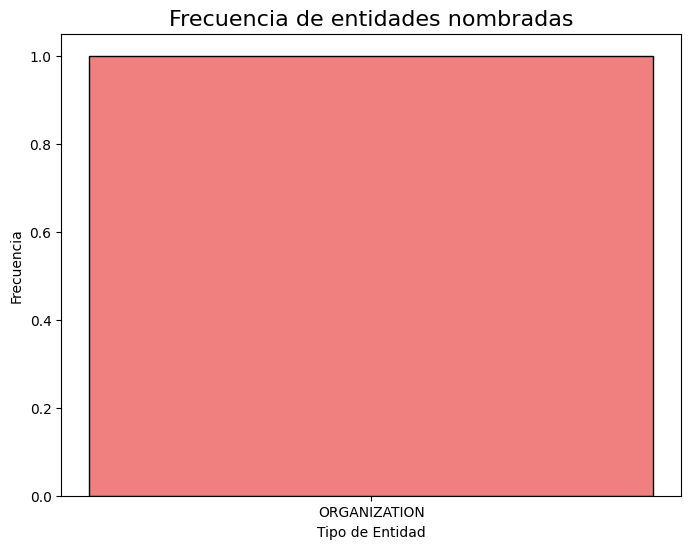

In [15]:
entity_counts = {etiqueta: len(entidad_lista) for etiqueta, entidad_lista in entidades.items()}

if entity_counts:  # Verificar si hay entidades nombradas antes de graficar
    labels_entidades, values_entidades = zip(*entity_counts.items())

    plt.figure(figsize=(8, 6))
    plt.bar(labels_entidades, values_entidades, color='lightcoral', edgecolor='black')
    plt.title("Frecuencia de entidades nombradas", fontsize=16)
    plt.xlabel("Tipo de Entidad")
    plt.ylabel("Frecuencia")
    plt.show()
else:
    print("No se encontraron entidades nombradas.")

## Conclusión general

El análisis realizado sobre Coursera indica que los cursos están más enfocados en estudiantes que están iniciando ya que se muestra una alta demanda en ese sector pero también cuenta con cursos que son de nivel intermedio y avanzado que tienen una significativa diferencia en cuanto a la cantidad de estudiantes que ven dichos cursos.
Los cursos son en su mayoria cursos completos ya que la duración de cada uno de ellos permite abarcar diversos contenidos. Donde también se puede visualizar que los cursos de categoria de ciencia de datos es el mas consumido por los estudiantes.

## Python en el análisi de datos

Python es una herramienta fundamental en el análisis de datos debido a su simplicidad y capacidad. Su fácil aprendizaje comparado a otros lenguajes permite concentrarse en el análisis, mientras que bibliotecas como Pandas, NumPy y Matplotlib facilitan la manipulación y visualización de datos. Además, Python es clave en áreas avanzadas como el machine learning y el procesamiento de lenguaje natural, con herramientas como NLTK. Su capacidad de integración con otros sistemas y la vasta comunidad que lo respalda lo convierten en una opción ideal para automatizar y optimizar flujos de trabajo en ciencia de datos.